# Simulating Networks

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [2]:
# Import NetworkX
import networkx as nx
import numpy as np

In [3]:
#to handle stats error in learning step
from statistics import mode
from statistics import StatisticsError

## Agent-Based Models

### Part 1: Initial Beliefs 
    Input: List of probabilities of bit = 1
    Input: True value, probability error 

In [4]:
G = nx.karate_club_graph()

In [5]:
def get_random_belief_bit (p):
    """Return a 1 with probability p and a 0 with probability (p - 1).
    
    # Params
    p: The probability of returning a 1

    # Return value
    1 with probability p, 0 otherwise.
    """
    
    val = np.random.uniform(low=0, high=1, size = 1)
    
    if val < p:
        x = 1
    else: 
        x = 0
    return x

In [6]:
#get_random_belief_bit (.5)

In [7]:
def get_random_belief (p1):
    """Get a random belief for a single agent.
    
    # Params
    p1: A list of numbers between 0 and 1. Each element of p1 represents 
    the probability the corresponding element of the belief list should be 1.
    
    # Return
    A list of length len(p1), with each element equal to 0 or 1.
    """
    
    list_bits = []

    for p in p1:
        bit = get_random_belief_bit(p)
        list_bits.append(bit)
    return list_bits

In [8]:
#get_random_belief (p1 = [0, 0.5, 1])

In [9]:
def initial_beliefs(G, p1):
    
    """Generate an initial beliefs for each node in G.
    The number of bits is determined by len(p1). 
    If there are 5 bits, p1 should have 5 elements.

    # Params
    G: A graph
    p1: an array of real numbers between 0 and 1. p1[i] is the 
    probability that bit i of the belief is 1.

    # Return
    A dict mapping nodes in G to lists of length len(p1).
    """
    beliefs = {}
    for v in G.nodes():
        l_beliefs = []
        list_bits = get_random_belief (p1) 
        l_beliefs = list_bits
        beliefs[v] = l_beliefs
    return beliefs

In [10]:
#initial_beliefs(G, p1 = [0, 0.5, 1])

In [11]:
def initial_beliefs_noisy(true_value, p_error):
    '''Generates a list of beliefs with a probability error 
    #Params 
    true_value: A list of true bits
    p_error: probability an error 
    
    #Return 
    A dict of beliefs with a noise (p_error)
    '''
    
    beliefs = {}
    
    p1 = []
    
    for bit in true_value:
        
        if bit == 1:
            x =  1 - p_error
            p1.append(x)
            
        else:
            x = p_error
            p1.append(x)
    
    beliefs = initial_beliefs(G, p1)
    return beliefs

In [12]:
#initial_beliefs_noisy(true_value=[1], p_error= .40)

## Part 2: Learning Strategies 
    Strategies:
        Mode per coordinate (find_neighbor_bit_mode)
        Random neighbor's value per coordinate (random_neighbor_bit(G, beliefs))
        Random neighbor's entire list (rand_neighbor_list(G, beliefs))
        Most popular list ()
        Best neighboor: choose value from neighboors closest to the true value 

In [13]:
def find_neighbor_bit_mode(G, v, beliefs, bit):
    '''
    The spec should be almost the same, but should be replaced with a function for finding 
    the mode for a particular bit:
    Among node v and its neighbors, find the most common belief in the specified bit.
    
    # Params
    G: a Graph
    v: a node in G
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    bit: An integer >= 0 corresponding an index of the belief lists.
    
    # Return value
    The most common belief (at the specified bit) among v and its neighbors or beliefs[v][bit] if there is a tie.
    '''
    #for test
    neighbors_bit_value = []
    #include bit value of v in mode calculation
    node_belief = beliefs[v]
    try:
        neighbors_bit_value.append(node_belief[bit])
    except TypeError:
        print(node_belief)
    for w in G.neighbors(v):
        neighbors_bit_value.append(beliefs[w][bit])
        try:
            popular_val = mode(neighbors_bit_value)
        except StatisticsError: 
            popular_val = beliefs[v][bit]
    return popular_val

In [14]:
#find_neighbor_bit_mode(G, v = 0, beliefs = initial_beliefs(G, p1 = [.0,1, 0.2]), bit = 2)

In [15]:
def learning_step(G, beliefs):
    '''Update each node's beliefs based on its neighbors' beliefs
    # Params
    G: a Graph
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    
    # Return value
    Dict of new beliefs for v
    '''
    new_beliefs = {}
    for v in G.nodes():
        num_beliefs = []
        #call function 
        for bit in range(len(beliefs[v])):
            new_belief = find_neighbor_bit_mode(G, v, beliefs, bit)
            num_beliefs.append(new_belief)
            #print(num_beliefs)
        new_beliefs[v] = num_beliefs
    return new_beliefs

In [16]:
#learning_step(G, initial_beliefs(G, p1 = [.532006, .45991, .501, 0.7, 0.4]))

In [17]:
def get_belief_bit_fraction(G, beliefs, bit):

    '''Get the fraction of nodes that have 1 in given bit
    Params 
    G: graph
    beliefs: set of beliefs for each node
    bit = given index
    returns fraction of nodes that have a 1 in given bit. 
    '''
    #fraction of nodes with 1 in given bit
    #print(beliefs)
    
    node_bit_value = []
    for v in G.node():
        #print(beliefs[v][bit])
        node_bit_value.append(beliefs[v][bit]) 
        #print(beliefs, beliefs[v][bit])
    #print(node_bit_value)
    frac_nodes_one = sum(node_bit_value) / len(node_bit_value)
    return frac_nodes_one

In [18]:
#get_belief_bit_fraction(G, beliefs = initial_beliefs(G, p1 = [.4732006, .45991]), bit = 0)

In [19]:
def random_neighbor_bit(G, beliefs):
    '''For a given bit, choose a neighbor randomly an adopt its belief at given position
    # Params
    G: a Graph
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    
    # Return value
    A list of belief where each bit is randomly chosen among v's neighbors
    '''
    new_beliefs = {}

    
    for v in G.nodes():
        #print(beliefs[v])
        num_bit = len(beliefs[v])
        rand_beliefs = [] #temp list to hold new rand vals
        
        for bit in range(num_bit):
            bit_val = [] #append all the neighs val at position bit
            
            for w in G.neighbors(v):
                
                vals_pos_bit = beliefs[w][bit] #first find the val at pos bit of each neigh, safe it in temp var
                bit_val.append(vals_pos_bit) #add all the vals at position bit
    
        #print (bit_val)
    
            new_rand_val = random.choice(bit_val) # randomly select one of the vals      
            rand_beliefs.append(new_rand_val) #add the randomly selected val to a temp list called rand_beliefs        
        #print(rand_beliefs)
            
        new_beliefs[v] = rand_beliefs#assing the new rand vals to new beliefs 
        #print(new_beliefs)
    return new_beliefs

In [20]:
#G = nx.karate_club_graph()
#beliefs = initial_beliefs(G, p1 = [.29, .59, .09])
#random_neighbor_bit(G, beliefs)

In [21]:
def rand_neighbor_list(G, beliefs):
    '''For a given node, choose a neighboor randomly an adopt all its belief
    
    #Params 
    G: a Graph
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    
    # Return value
    A list of belief where each bit is randomly chosen among v's neighbors
    
    '''
    
    new_beliefs = {}
    
    current_beliefs = dict(beliefs)# a dict of beliefs 
    print(current_beliefs)

    beliefs = [current_beliefs]#makes a list that contains a dict. Dict contains 34 nodes, each with a list of bits
    #print(beliefs)
        
    nodes = list(current_beliefs.keys()) #makes a list with 34 keys. no longer vals with it.
    #print(nodes)
    
    
    for v in G.nodes():
        #print(v) # prints 34 nodes without values. just keys.
        neighboors_keys = [] #hold v's neighboors keys
        
        for w in G.neighbors(v):
            
            neighboors_keys.append(w)
            
        one_neigh = random.choice(neighboors_keys)
        
        #vals_rand = beliefs[one_neigh] #here's the problem. it doesn't have the vals of neigh. only has the key
        
        vals_rand = current_beliefs[one_neigh]# here's i solved it. 
        
        #print(vals_rand)
        
        new_beliefs[v] = vals_rand
        #print(new_beliefs[v])
    return new_beliefs
    
    #print(new_beliefs)

In [22]:
#G = nx.karate_club_graph()
#beliefs = initial_beliefs(G, p1 = [.29, .59, .09])
#rand_neighbor_list(G, beliefs)

## Part 3: Plotting 
    Fraction of nodes with true value
    Fraction of nodes with true value in each coordinate 
    Fraction of nodes that have 1 in each coordinate 

In [23]:
def learn(ini_beliefs, steps = 10):
    '''Runs the simulation, takes the list of inital beliefs and updates each bit based on the learning strategy
    #Parameters 
    inital_beliefs: The inital beliefs of each agent before the simulation
    step: number of iterations 
    
    #Returns 
    A list of agent's beliefs over time
    '''
    
    current_beliefs = dict(ini_beliefs) #starts a dict of nodes and their list of beliefs//
    #print("Current beliefs", current_beliefs)
    
    beliefs = [current_beliefs]  #made the dict into a list. 
    #print("Made current beliefs of a list of dict", beliefs)
    
    #nodes && num_bit are use to iterate through each bit 
    nodes = list(current_beliefs.keys())
    num_bit = len(current_beliefs[nodes[0]])
  
    #update the belief after each step
    for i in range(steps + 1):
        if i < steps:
            current_beliefs = learning_step(G, current_beliefs) 
            #need to pass a param that will call diff strategies
            beliefs.append(current_beliefs)
    return beliefs

In [24]:
#ini_beliefs = initial_beliefs(G, p1 = [.79, .59, .69, .79, .490])
#learn(ini_beliefs)

In [25]:
def plot_beliefs_bits(beliefs_list):
    '''Plots the change of beliefs over time
    #Params
    beliefs_list: a list, each element is a dict of beliefs at one time [{}]
    
    plots the fraction of nodes that have a one in a given bit
    '''
    
    current_beliefs = beliefs_list #a list of dict. each key:value pair is a node, and a LIST of beliefs.
    
    #determine number of bits 
    nodes = list(current_beliefs[0].keys()) 
    num_bit = len(current_beliefs[0][nodes[0]])
    
    y = dict((bit, list()) for bit in range(num_bit))

    #takes the list of beliefs in each iteration. Then for each bit, takes the fraction that 
    #have a 1 and adds them to y (the plotting varaible)
    for steps_beliefs in current_beliefs:
        for bit in range(num_bit):
            bit_avg = get_belief_bit_fraction(G, steps_beliefs, bit) 
            y[bit].append(bit_avg) 
        
    #plot the fract of nodes in bit that have a one
    for bit in y:
        plt.plot(y[bit], '-', alpha=0.4, linewidth=2, label  = str(bit))

    #add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    #plt.xlim([0, steps]) 
    #plt.ylim([0, 1])
    plt.legend()

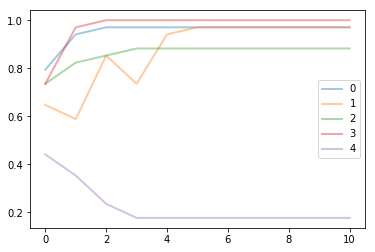

In [26]:
ini_beliefs = initial_beliefs(G, p1 = [.79, .59, .69, .79, .490])
beliefs_list =  learn(ini_beliefs, steps = 10)
plot_beliefs_bits(beliefs_list)

In [27]:
#G = nx.karate_club_graph()
#plt.subplot(1, 1, 1)
#plt.title("Karate club")
#beliefs = initial_beliefs(G, p1 = [.79, .59, .69, .79, .490])
#plot_beliefs(G, beliefs, steps = 10)
#plt.tight_layout()

In [28]:
#plt.subplot(1, 1, 1)
#plt.title("SW")
#G_SW = nx.watts_strogatz_graph(100, 4, 0.001)
#beliefs = initial_beliefs(G_SW, p1 = [.79, .59, .69, .79, .490, .5])
#plot_beliefs(G_SW, beliefs, steps = 10)
#plt.tight_layout()

In [29]:
#plt.subplot(1, 1, 1)
#plt.title("Preferential Attachment")
#G_preferential_500 = nx.barabasi_albert_graph(500, 1)
#beliefs = initial_beliefs(G_preferential_500, p1 = [.79, .59, .69, .79, .490, .5])
#plot_beliefs(G_preferential_500, beliefs, steps = 10)
#plt.tight_layout()

In [30]:
def plot_beliefs_correct(list_of_beliefs, true_value):
    '''Plots the fraction of ones that have the correct string of bits over time.
    #Params 
    list_of_beliefs: a list of dict, each element is a dict of beliefs at one step [{}]
    true_value: the true string of bits
    
    #Return value
    A plot with the fraction of nodes with the correct string of values
    '''
    
    current_beliefs = list_of_beliefs #gives me a list of all the beliefs in all steps
    
    y = []
    #print(y)
    
    for steps_beliefs in current_beliefs: #gives me a dict of all beliefs in all steps 
        #print(steps_beliefs) #steps_beliefs gives me the keys
        total = 0
        for v in G.node():
            #print(v, steps_beliefs[v])
            if steps_beliefs[v] == true_value:
                #print ("The list are equal") 
                total += 1
            #else:
             #   print ("The list aren't equal")
        frac_nodes_one = (total) / (len(G))
         #append the fraction of nodes that have same string
        y.append(frac_nodes_one) 
        #print(y)
            
    plt.plot(y, 'y-', alpha=0.4, linewidth=2)

    #add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    #plt.xlim([0, steps]) 
    #plt.ylim([0, 1])
    plt.legend()
        

No handles with labels found to put in legend.


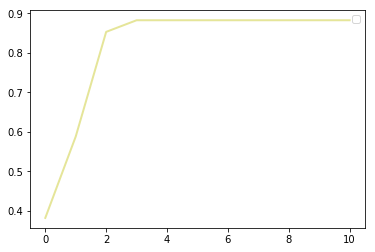

In [31]:
ini_beliefs = initial_beliefs(G, p1 = [.09, .59, .39])
beliefs_list =  learn(ini_beliefs, steps = 10)
plot_beliefs_correct(beliefs_list, true_value = [0, 1, 0])

In [32]:
#G = nx.karate_club_graph()
#beliefs = initial_beliefs(G, p1 = [.8,.8,.2,.2,.8])
#plot_noisy_beliefs(G, beliefs, true_value = [1,1,0,0,1])

In [33]:
### G = nx.karate_club_graph()
#plt.title("Karate Club")
#plt.subplot(1, 1, 1)
#beliefs = initial_beliefs(G, p1 = [.29, .59, .09])
#plot_noisy_beliefs(G, beliefs, true_value = [0, 1, 0])
#plt.tight_layout()

## I don't need this lines: